# **Nombre:** Miller Alexis Quintero García

**Observación:** Personalmente modifiqué ligeramente un poco esta sección inicial de preparación de los datos, para tener mayor noción de que es lo que tengo, obtener un poco más de información, visualizar los dataframes en cada etapa y revisar si existe algún desbalanceo en los datos. Todo lo comenté ya sea con comentarios de línea en Python, o con texto en celdas Markdown. 

En mi computador de escritorio que tiene un procesador AMD Ryzen 5 3400G, 16 GB de RAM y no tiene tarjeta gráfica, el notebook tardó aproximadamente 7 minutos en correr de inicio a fin.

De antemano, muchas gracias.

## EJERCICIO 3 - AVANZADO

El fichero `hr_train.csv` contiene una tabla sobre los empleados de una empresa. Entre otros incluye información de su nivel de satisfacción, de la última evaluaciún obtenida, del número de proyecto en el que se encuentra, del número medio de horas por semana, del número de años que lleva en la compañia, si ha tenido o no un accidente en el trabajo, **si se ha ido (left = 1)** de la compañia, si ha tenido una promoción en los últimos 5 años, y por último su nivel salarial (descrito como medio, alto o bajo) y el departamento en que se encuentra (sales/technnical ...).

El departamento de RRHH esta solicitando un clasificador que pueda predecir si alguien esta en riesgo de irse de la compañia para poder actuar  proactivamente. 

Notas:
- La columna "left" indica si alguien se ha ido de la compañia, es la **"y"** del problema y el objetivo de la predicción.
- Las columnas "sales" y "salary" son alfanuméricas. La mayoría de clasificadores (aunque no todos) no trabajan bien con este tipo de variables y requieren valores numéricos. Dado el caso dispones de diferentes alternativas: 
    (1) Eliminar esas columnas y trabajar con el resto.
    (2) Traducir esas columnas en columnas binarias; por ejemplo si "salary" tiene tres valores, eliminar la columna original y sustituirla por tres columnas salary_low, salary_medium, salary_high donde se pondra un 1 en el tipo de salario y un 0 en las otras dos columnas restantes. Lo mismo para "sales", donde se transformara esa columna en tantas columnas como departamentos y un 1 en el departamento en que se encuentre el trabajador. Este es un preproceso muy típico.

Nota de evaluación:

En este ejercicio más que el resultado final (que también) se evaluara los pasos y el razonamiento utilizado en cada decisión que se toma para la implementación del modelo. 

## Preparación de los datos
Desde mi punto de vista es importante incluir los datos relacionados con el salario y el departamento. Por un lado el salario siempre es importante en cualquier trabajo, cualquier persona razona un poco antes de renunciar si su salario es destacado según su sector y profesión; por otro lado el departamento al que pertenece un empleado también es importante, no todos los empleados se sienten igual en el mismo departamento.

Debido a las razones anteriores, considero importante incluir dichas variables de forma apropiada para los modelos de aprendizaje automático, para esto es necesario entonces convertir dichas variables alfanuméricas a númericas categóricas agregando la serie de columnas necesarias.

In [1]:
import pandas as pd
import numpy as np

file1 = r'hr_train.csv'

ci = pd.read_csv(file1)
ci

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
10494,0.82,0.84,3,237,2,0,0,0,technical,low
10495,0.85,0.81,3,205,3,0,0,0,marketing,high
10496,0.32,0.95,5,172,2,0,1,0,sales,low
10497,0.51,0.76,4,140,3,0,1,0,support,low


In [2]:
# Verificamos si hay desbalance en la variable de salida
print(ci.left.value_counts())

left
0    7424
1    3075
Name: count, dtype: int64


In [3]:
# Vemos que variedad de valores alfanuméricos tiene la variable 'salary'
print(ci.salary.value_counts())
# Y la cantidad de valores únicos
print(f"\nHay {ci.salary.nunique()} valores únicos en la variable 'salary'")

salary
low       5104
medium    4515
high       880
Name: count, dtype: int64

Hay 3 valores únicos en la variable 'salary'


In [4]:
# Vemos que variedad de valores alfanúmericos tiene la variable 'sales'
print(ci.sales.value_counts())
# Y la cantidad de valores únicos
print(f"\nHay {ci.sales.nunique()} valores únicos en la variable 'sales'")

sales
sales          2935
technical      1890
support        1556
IT              825
product_mng     639
marketing       614
hr              532
RandD           530
accounting      527
management      451
Name: count, dtype: int64

Hay 10 valores únicos en la variable 'sales'


Como hay 3 valores únicos en 'salary' y 10 en 'sales', implica que una vez convertidos los datos a categóricos numéricos, el dataframe tendrá 13 columnas nuevas.

In [5]:
# Importamos el módulo de OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Creamos el objeto OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore', dtype = np.int8)
# Ajustamos el objeto a las variables categóricas
encoder.fit(ci[['salary', 'sales']])

# Obtenemos el nombre de las columnas que se generarán
columns = encoder.get_feature_names_out(['salary', 'sales'])
# Creamos un DataFrame con las columnas generadas
df = pd.DataFrame(encoder.transform(ci[['salary', 'sales']]), columns=columns)
# Concatenamos el DataFrame original con el nuevo DataFrame
ci = pd.concat([ci, df], axis=1)

ci

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.42,0.46,2,150,3,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
1,0.66,0.77,2,171,2,0,0,0,technical,medium,...,0,0,0,0,0,0,0,0,0,1
2,0.55,0.49,5,240,3,0,0,0,technical,high,...,0,0,0,0,0,0,0,0,0,1
3,0.22,0.88,4,213,3,1,0,0,technical,medium,...,0,0,0,0,0,0,0,0,0,1
4,0.20,0.72,6,224,4,0,1,0,technical,medium,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,0.82,0.84,3,237,2,0,0,0,technical,low,...,0,0,0,0,0,0,0,0,0,1
10495,0.85,0.81,3,205,3,0,0,0,marketing,high,...,0,0,0,0,0,1,0,0,0,0
10496,0.32,0.95,5,172,2,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
10497,0.51,0.76,4,140,3,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# Eliminamos las columnas de las variables alfanuméricas originales
ci.drop(['salary', 'sales'], axis=1, inplace=True)
# Mostramos el DataFrame resultante
ci

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.42,0.46,2,150,3,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.66,0.77,2,171,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.55,0.49,5,240,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.22,0.88,4,213,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.20,0.72,6,224,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,0.82,0.84,3,237,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10495,0.85,0.81,3,205,3,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10496,0.32,0.95,5,172,2,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10497,0.51,0.76,4,140,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# Verificamos si hay o no valores de nulidad o NaN
print(ci.isna().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary_high              0
salary_low               0
salary_medium            0
sales_IT                 0
sales_RandD              0
sales_accounting         0
sales_hr                 0
sales_management         0
sales_marketing          0
sales_product_mng        0
sales_sales              0
sales_support            0
sales_technical          0
dtype: int64


No hay valores None o NaN en las columnas de las variables

In [8]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10499 non-null  float64
 1   last_evaluation        10499 non-null  float64
 2   number_project         10499 non-null  int64  
 3   average_montly_hours   10499 non-null  int64  
 4   time_spend_company     10499 non-null  int64  
 5   Work_accident          10499 non-null  int64  
 6   left                   10499 non-null  int64  
 7   promotion_last_5years  10499 non-null  int64  
 8   salary_high            10499 non-null  int8   
 9   salary_low             10499 non-null  int8   
 10  salary_medium          10499 non-null  int8   
 11  sales_IT               10499 non-null  int8   
 12  sales_RandD            10499 non-null  int8   
 13  sales_accounting       10499 non-null  int8   
 14  sales_hr               10499 non-null  int8   
 15  sa

In [9]:
ci.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
count,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,...,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.00000,10499.000000,10499.000000
mean,0.612683,0.717131,3.808553,201.059815,3.494238,0.144299,0.292885,0.021716,0.083818,0.486142,...,0.078579,0.050481,0.050195,0.050671,0.042956,0.058482,0.060863,0.27955,0.148205,0.180017
std,0.248578,0.171483,1.230572,49.959332,1.453227,0.351410,0.455108,0.145763,0.277127,0.499832,...,0.269093,0.218946,0.218358,0.219336,0.202769,0.234663,0.239090,0.44880,0.355320,0.384220
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Vamos a separar ahora las variable objetivo **'left'** de los datos.

In [10]:
# Tomamos la columna 'left' como variable dependiente y el resto como variables independientes
X = ci.drop(['left'], axis=1)
y = ci['left']
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.42,0.46,2,150,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.66,0.77,2,171,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.55,0.49,5,240,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.22,0.88,4,213,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.20,0.72,6,224,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,0.82,0.84,3,237,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
10495,0.85,0.81,3,205,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
10496,0.32,0.95,5,172,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
10497,0.51,0.76,4,140,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [11]:
y

0        1
1        0
2        0
3        0
4        1
        ..
10494    0
10495    0
10496    1
10497    1
10498    0
Name: left, Length: 10499, dtype: int64

In [12]:
y.value_counts()

left
0    7424
1    3075
Name: count, dtype: int64

Como hay un desbalance entre las clases a clasificar, en la función `train_test_split` especificamos que se repartan los datos guardando la proporción con el argumento `stratify = y`.

In [13]:
from sklearn.model_selection import train_test_split
# Dividimos el conjunto de datos en un 80% para entrenamiento y un 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Reseteamos los índices de los DataFrames
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [14]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.66,0.79,5,134,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.93,0.97,3,256,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0.86,0.71,3,235,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,0.74,0.99,4,233,5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,0.84,0.64,2,211,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.99,0.54,3,247,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
8395,0.94,0.73,4,204,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8396,0.95,0.74,4,258,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8397,0.43,0.56,2,129,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [15]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.82,0.98,5,234,5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0.98,0.84,4,200,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0.44,0.54,2,151,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0.76,0.84,5,249,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0.60,0.65,2,225,10,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.64,0.38,2,269,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2096,0.67,0.97,4,186,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2097,0.86,0.84,3,177,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2098,0.34,0.46,5,131,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [16]:
y_train

0       0
1       0
2       0
3       1
4       0
       ..
8394    1
8395    0
8396    1
8397    1
8398    1
Name: left, Length: 8399, dtype: int64

In [17]:
y_test

0       1
1       0
2       1
3       0
4       0
       ..
2095    1
2096    0
2097    0
2098    0
2099    1
Name: left, Length: 2100, dtype: int64

## Definición de métrica clave
La prioridad de RRHH es tomar acciones frente a empleados con alta posibilidad de renunciar, dicha información está contenida en los datos objetivo **y**, de manera que un empleado que renuncio es un **1**, por tal motivo del modelo se debe centrar en detectar lo mejor posible los casos positivos, de manera que tener falsos negativos es peor que tener falsos positivos, pues es preferible tomar acciones inclusive hasta en algunos empleados que probablemente no se iban a ir, que no tomar acciones en empleados que probablemente si se van a ir.

Por tal motivo considero que la métrica de decisión debe ser el ***recall*** ya que si observamos su ecuación:

$$Recall = \frac{TP}{TP+FN}$$

Vemos que esta métrica se puede maximizar si los casos de falsos negativos (empleados que si es probable que se vayan pero se predijo que no) se disminuyen.

In [18]:
# Importamos la métrica de 'accuracy' y 'recall'
from sklearn.metrics import accuracy_score, recall_score

## Normalización de datos

Ya que vamos a probar variedad de modelos, algunos de estos requerirán datos normalizados, como en el análisis exploratorio de los datos no se vieron outliers e ningún tipo, se probará simplemente un MinMaxScaler.

In [19]:
# Importamos el normalizador MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Creamos el objeto MinMaxScaler
scaler = MinMaxScaler()
# Ajustamos el objeto a los datos de entrenamiento
scaler.fit(X_train)
# Transformamos los datos de entrenamiento y test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[0.62637363, 0.671875  , 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.92307692, 0.953125  , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.84615385, 0.546875  , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.94505495, 0.59375   , 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.37362637, 0.3125    , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.02197802, 0.734375  , 0.8       , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
X_test_scaled

array([[0.8021978 , 0.96875   , 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.97802198, 0.75      , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.38461538, 0.28125   , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.84615385, 0.75      , 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.27472527, 0.15625   , 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.12087912, 0.84375   , 0.8       , ..., 0.        , 0.        ,
        1.        ]])

## Modelos

### Logistic Regression
Desde un punto de vista de pensarlo como un problema de predecir probabilidades vamos a empezar utilizando regresión logistica.

In [22]:
# Importamos el módulo de LogisticRegression
from sklearn.linear_model import LogisticRegression

# Creamos el objeto LogisticRegression
model = LogisticRegression(max_iter = 1000, random_state = 42)
# Ajustamos el modelo a los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Predecimos los valores de la variable dependiente para el conjunto de test
y_pred = model.predict(X_test_scaled)

# Calculamos la métrica de 'accuracy' en train para ver que no hay overfitting
y_train_pred = model.predict(X_train_scaled)
print(f"Accuracy en train: {accuracy_score(y_train, y_train_pred)}")
# Calculamos la métrica de 'accuracy' en test
print(f"Accuracy en test: {accuracy_score(y_test, y_pred)}")

# Calculamos la métrica de 'recall' en test
print(f"Recall en test: {recall_score(y_test, y_pred)}")

Accuracy en train: 0.7213954042147874
Accuracy en test: 0.7176190476190476
Recall en test: 0.23902439024390243


In [23]:
# Mostramos la probabilidad de pertenecer a cada clase
y_pred_proba = model.predict_proba(X_test_scaled)
# Vemos cuantas instancias del conjunto de test tienen una probabilidad mayor o igual a 0.5 de pertenecer a la clase 1
print(f"Hay {np.sum(y_pred_proba[:, 1] >= 0.5)} instancias del conjunto de test con probabilidad mayor o igual a 0.5 de pertenecer a la clase 1")
# Vemos cuantas instancias del conjunto de test tienen una probabilidad mayor o igual a 0.5 de pertenecer a la clase 0
print(f"Hay {np.sum(y_pred_proba[:, 0] >= 0.5)} instancias del conjunto de test con probabilidad mayor o igual a 0.5 de pertenecer a la clase 0")

# Mostramos la cantidad de instancias totales del conjunto de test
print(f"Hay {len(y_test)} instancias en total en el conjunto de test")

Hay 272 instancias del conjunto de test con probabilidad mayor o igual a 0.5 de pertenecer a la clase 1
Hay 1828 instancias del conjunto de test con probabilidad mayor o igual a 0.5 de pertenecer a la clase 0
Hay 2100 instancias en total en el conjunto de test


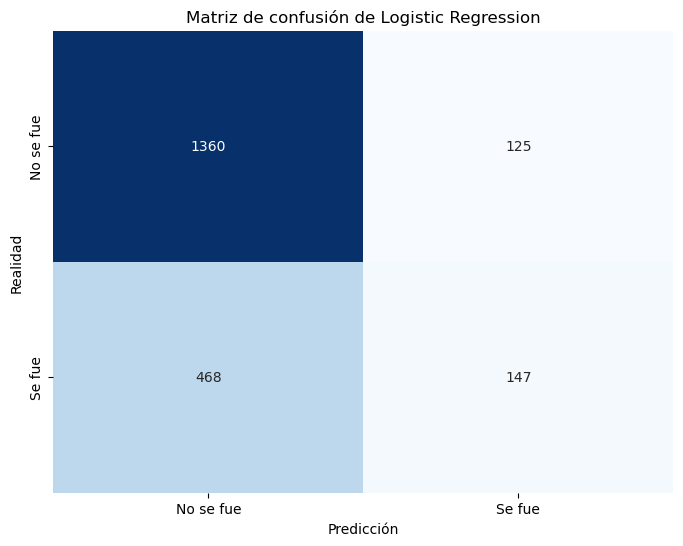

In [24]:
# Veamos ahora la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Creamos un DataFrame con la matriz de confusión
cm_df = pd.DataFrame(cm, index = ['No se fue', 'Se fue'], columns = ['No se fue', 'Se fue'])
# Mostramos la matriz de confusión
plt.figure(figsize = (8, 6))
sns.heatmap(cm_df, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Matriz de confusión de Logistic Regression')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

En general vemos que el modelo tiene un error importante al observar los falsos negativos, de manera que hay muchas instancias en las que predijo que el empleado no se fue, cuando en realidad si se fue, esto es grave ya que nos aleja del objetivo que tiene el departamento de RRHH con el modelo, el cuál es predecir lo mejor posible dichos casos, y esa falencia del modelo se ve reflejada en su baja métrica de **recall**.

### Gradient Boosting Classifier

Este es otro modelo importante a considerar, pasando por encima del Decission Tree y el Random Forest, ya que tiene usualmente ventajas frente al primero en desempeño, y en rendimiento frente al segundo.

Para hacerlo lo mejor posible vamos a probar diferentes learning rate ($\alpha$) con GridSearchCV

In [25]:
# Importamos el módulo de GradientBoostingClassifier y GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Creamos el objeto GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = 42)
# Definimos los parámetros a ajustar
params = {
    'learning_rate': [0.2, 0.3, 0.5, 1.0, 2.0]
    , 'n_estimators': [50, 100, 200]
}

# Creamos el objeto GridSearchCV optimizando la métrica de 'recall'
grid = GridSearchCV(estimator = gbc, param_grid = params, scoring = 'recall', cv = 10)
# Ajustamos el objeto a los datos de entrenamiento, considerando que un GBC no requiere normalización
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.2, 0.3, 0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [ ]:
# Vemos los resultados del GridSearchCV
grid_results = pd.DataFrame(grid.cv_results_).loc[:, ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("Los mejores parámetros son:", grid.best_params_)
grid_results

El mejor parámetro de 'learning_rate' es: {'learning_rate': 0.5, 'n_estimators': 200}


,params,mean_test_score,std_test_score,rank_test_score
0,"{'learning_rate': 0.2, 'n_estimators': 50}",0.686179,0.022472,12
1,"{'learning_rate': 0.2, 'n_estimators': 100}",0.691057,0.024525,7
2,"{'learning_rate': 0.2, 'n_estimators': 200}",0.691463,0.028597,6
3,"{'learning_rate': 0.3, 'n_estimators': 50}",0.687398,0.024011,11
4,"{'learning_rate': 0.3, 'n_estimators': 100}",0.691463,0.024080,5
5,"{'learning_rate': 0.3, 'n_estimators': 200}",0.693089,0.024542,4
6,"{'learning_rate': 0.5, 'n_estimators': 50}",0.688618,0.022428,10
7,"{'learning_rate': 0.5, 'n_estimators': 100}",0.690244,0.025177,8
8,"{'learning_rate': 0.5, 'n_estimators': 200}",0.695935,0.029189,1
9,"{'learning_rate': 1.0, 'n_estimators': 50}",0.689024,0.021064,9


In [27]:
# Tomamos el mejor modelo del GridSearchCV
gbc_best = grid.best_estimator_

# Predecimos los valores de la variable dependiente para el conjunto de test
y_pred_gbc = gbc_best.predict(X_test)

# Calculamos la métrica de 'accuracy' en train para ver que no hay overfitting
y_train_pred_gbc = gbc_best.predict(X_train)
print(f"Accuracy en train: {accuracy_score(y_train, y_train_pred_gbc)}")
# Calculamos la métrica de 'accuracy' en test
print(f"Accuracy en test: {accuracy_score(y_test, y_pred_gbc)}")
# Calculamos la métrica de 'recall' en test
print(f"Recall en test: {recall_score(y_test, y_pred_gbc)}")

Accuracy en train: 0.9097511608524824
Accuracy en test: 0.8595238095238096
Recall en test: 0.6536585365853659


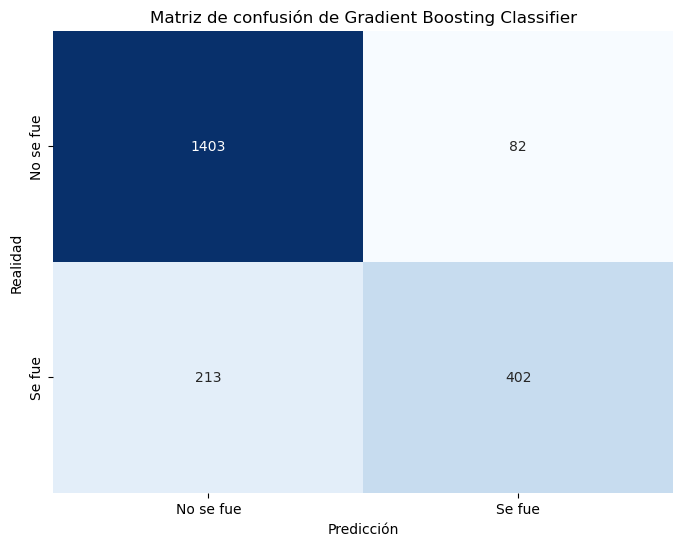

In [28]:
# Creamos la matriz de confusión
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
# Creamos un DataFrame con la matriz de confusión
cm_df_gbc = pd.DataFrame(cm_gbc, index = ['No se fue', 'Se fue'], columns = ['No se fue', 'Se fue'])
# Mostramos la matriz de confusión
plt.figure(figsize = (8, 6))
sns.heatmap(cm_df_gbc, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Matriz de confusión de Gradient Boosting Classifier')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Vemos en general que este modelo con búsqueda del mejor learning rate y número de estimadores, resultó mucho mejor en sus predicciones, tanto la métrica de recall como en la de accuracy.

### Multi-layer Perceptron Classifier

Estos modelos aunque son costos computacionalmente, representan desde su arquitectura, una forma muy personalizable de construir el modelo, buscando desde el conocimiento teórico y de los datos, el mejor modelo posible.

Ahora bien, considerando que los datos de entrada son vectores de características de 20 elementos y que la salida es binaria. Las capas de entrada y salida tienen 20 neuronas y 1 neurona respectivamente. Entonces, una serie de buenas arquitecturas base podrían ser:

- 3 capas ocultas de la forma (40, 20, 10).
- 3 capas ocultas de la forma (20, 10, 5).
- 2 capas ocultas de la forma (10, 5).

In [29]:
# Importamos el módulo de Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier

# Creamos el diccionario de parámetros a ajustar
params = {
    'hidden_layer_sizes': [(40, 20, 10), (20, 10, 5), (10, 5)]}

# Creamos el objeto MLPClassifier
mlp = MLPClassifier(max_iter = 1000, random_state = 42)
# Creamos el objeto GridSearchCV optimizando la métrica de 'recall', y con solo 3 folds por coste computacional
grid = GridSearchCV(estimator = mlp, param_grid = params, scoring = 'recall', cv = 3)
# Ajustamos el objeto a los datos de entrenamiento escalados, ya que esto beneficia a los MLP
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             param_grid={'hidden_layer_sizes': [(40, 20, 10), (20, 10, 5),
                                                (10, 5)]},
             scoring='recall')

In [31]:
# Vemos los resultados del GridSearchCV
grid_results = pd.DataFrame(grid.cv_results_).loc[:, ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("El mejor parámetro de 'hidden_layer_sizes' es:", grid.best_params_)
grid_results

El mejor parámetro de 'hidden_layer_sizes' es: {'hidden_layer_sizes': (20, 10, 5)}


,params,mean_test_score,std_test_score,rank_test_score
0,"{'hidden_layer_sizes': (40, 20, 10)}",0.652033,0.002073,3
1,"{'hidden_layer_sizes': (20, 10, 5)}",0.667480,0.019571,1
2,"{'hidden_layer_sizes': (10, 5)}",0.664634,0.015554,2


In [32]:
# Tomamos el mejor modelo del GridSearchCV
mlp_best = grid.best_estimator_

# Predecimos los valores de la variable dependiente para el conjunto de test
y_pred_mlp = mlp_best.predict(X_test_scaled)

# Calculamos la métrica de 'accuracy' en train para ver que no hay overfitting
y_train_pred_mlp = mlp_best.predict(X_train_scaled)
print(f"Accuracy en train: {accuracy_score(y_train, y_train_pred_mlp)}")
# Calculamos la métrica de 'accuracy' en test
print(f"Accuracy en test: {accuracy_score(y_test, y_pred_mlp)}")
# Calculamos la métrica de 'recall' en test
print(f"Recall en test: {recall_score(y_test, y_pred_mlp)}")

Accuracy en train: 0.8815335158947494
Accuracy en test: 0.8595238095238096
Recall en test: 0.6601626016260163


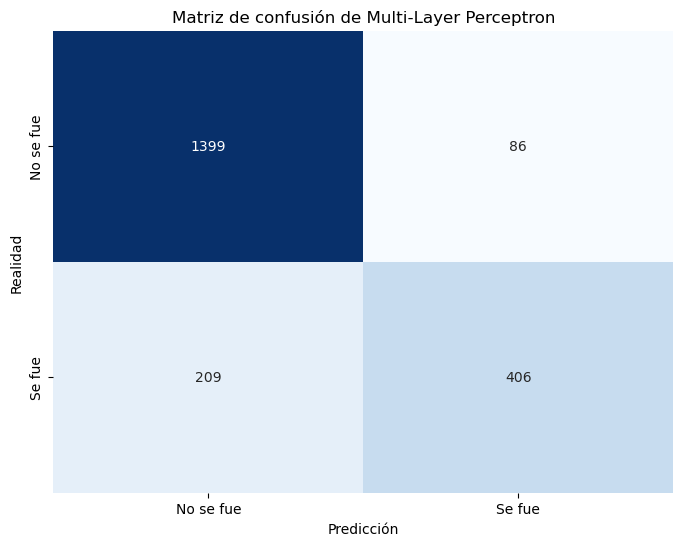

In [33]:
# Creamos la matriz de confusión
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
# Creamos un DataFrame con la matriz de confusión
cm_df_mlp = pd.DataFrame(cm_mlp, index = ['No se fue', 'Se fue'], columns = ['No se fue', 'Se fue'])
# Mostramos la matriz de confusión
plt.figure(figsize = (8, 6))
sns.heatmap(cm_df_mlp, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Matriz de confusión de Multi-Layer Perceptron')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Vemos en general que el modelo óptimo de Perceptrón es ligeramente mejor entorno a la métrica clave de **recall** que el Gradient Boosting, sin embargo la diferencia sigue siendo muy pequeña.

### Random Forest

Debido a una inconformidad de los resultados en torno a la métrica de **'recall'**, se opta por buscar una alternativa en este modelo, al consistir en diversos árboles de decisión que crean reglas de separación de clases y que hacen votación, podría dar buenos resultados.

In [ ]:
# Importamos el módulo de RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Creamos el diccionario de parámetros a ajustar
params = {
    # Número de árboles impar para evitar empates en votación
    'n_estimators': [51, 101]
    , 'max_depth': [15 ,20]
    , 'min_samples_split': [1 ,2 , 5]
}
# Creamos el objeto RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)

# Creamos el objeto GridSearchCV optimizando la métrica de 'recall' y con los 5 folds por defecto
grid = GridSearchCV(estimator = rfc, param_grid = params, scoring = 'recall')
# Ajustamos el objeto a los datos de entrenamiento, considerando que un RFC no requiere normalización
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [15, 20, 25],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [51, 101, 201]},
             scoring='recall')

In [51]:
# Creamos un DataFrame con los resultados del GridSearchCV
grid_results = pd.DataFrame(grid.cv_results_).loc[:, ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("Los mejores parámetros son:", grid.best_params_)
grid_results

Los mejores parámetros son: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 201}


,params,mean_test_score,std_test_score,rank_test_score
0,"{'max_depth': 15, 'min_samples_split': 2, 'n_e...",0.686585,0.022317,5
1,"{'max_depth': 15, 'min_samples_split': 2, 'n_e...",0.687398,0.020544,3
2,"{'max_depth': 15, 'min_samples_split': 2, 'n_e...",0.688618,0.021717,1
3,"{'max_depth': 15, 'min_samples_split': 5, 'n_e...",0.683740,0.025921,11
4,"{'max_depth': 15, 'min_samples_split': 5, 'n_e...",0.684146,0.025857,9
5,"{'max_depth': 15, 'min_samples_split': 5, 'n_e...",0.683740,0.023863,11
6,"{'max_depth': 15, 'min_samples_split': 10, 'n_...",0.679675,0.026111,22
7,"{'max_depth': 15, 'min_samples_split': 10, 'n_...",0.678862,0.024492,25
8,"{'max_depth': 15, 'min_samples_split': 10, 'n_...",0.679268,0.022317,24
9,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.681707,0.017179,15


In [52]:
# Tomamos el mejor modelo del GridSearchCV
rfc_best = grid.best_estimator_

# Predecimos los valores de la variable dependiente para el conjunto de test
y_pred_rfc = rfc_best.predict(X_test)

# Calculamos la métrica de 'accuracy' en train para ver que no hay overfitting
y_train_pred_rfc = rfc_best.predict(X_train)
print(f"Accuracy en train: {accuracy_score(y_train, y_train_pred_rfc)}")
# Calculamos la métrica de 'accuracy' en test
print(f"Accuracy en test: {accuracy_score(y_test, y_pred_rfc)}")

# Calculamos la métrica de 'recall' en test
print(f"Recall en test: {recall_score(y_test, y_pred_rfc)}")

Accuracy en train: 0.9176092391951423
Accuracy en test: 0.8747619047619047
Recall en test: 0.6552845528455284


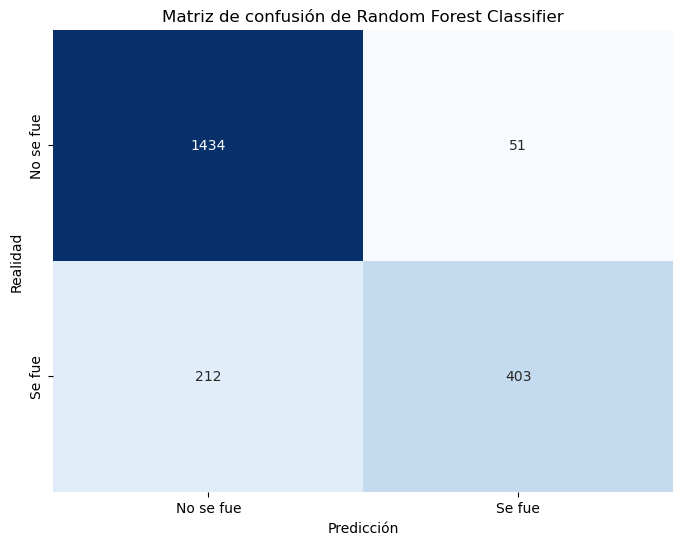

In [53]:
# Creamos la matriz de confusión
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
# Creamos un DataFrame con la matriz de confusión
cm_df_rfc = pd.DataFrame(cm_rfc, index = ['No se fue', 'Se fue'], columns = ['No se fue', 'Se fue'])
# Mostramos la matriz de confusión
plt.figure(figsize = (8, 6))
sns.heatmap(cm_df_rfc, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Matriz de confusión de Random Forest Classifier')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()